In [1]:
!python -V

Python 3.9.7


In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

In [12]:
df = pd.read_csv('/home/akash/Documents/programming/luminous hackathon ppt/Luminous MLOps/01-intro/Solar Power Plant Data.csv')
df.head()
# categorical = ['PULocationID', 'DOLocationID']
numerical = ['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity']

# df[categorical] = df[categorical].astype(str)

In [14]:
train_dicts = df[numerical]

dv = StandardScaler()
X_train = dv.fit_transform(train_dicts)

target = 'SystemProduction'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

897.1761873000875

/tmp/ipykernel_9559/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_9559/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


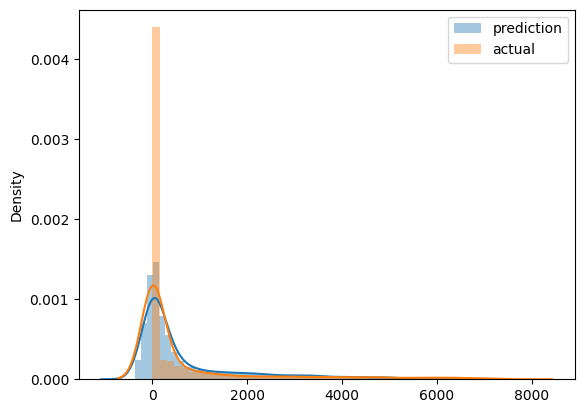

In [15]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [16]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

  
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
    
    return df

In [17]:
df_train = read_dataframe('/home/akash/Documents/programming/luminous hackathon ppt/Luminous MLOps/01-intro/Solar Power Plant Data.csv')
df_val = read_dataframe('/home/akash/Documents/programming/luminous hackathon ppt/Luminous MLOps/01-intro/Solar Power Plant Data.csv')

In [18]:
len(df_train), len(df_val)

(8760, 8760)

In [12]:
# df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
# df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [19]:
numerical = ['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity']
dv = StandardScaler()

train_dicts = df_train[numerical]
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[numerical]
X_val = dv.transform(val_dicts)

In [20]:
target = 'SystemProduction'
y_train = df_train[target].values
y_val = df_val[target].values

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

897.1761873000875

In [23]:
with open('/home/akash/Documents/programming/luminous hackathon ppt/Luminous MLOps/01-intro/models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [24]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

897.1761879635391